# Environment Setup and Dataset Download

In [ ]:
# Install required libraries
!pip install kagglehub pymoo pandas matplotlib seaborn

# Import libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download dataset
path = kagglehub.dataset_download("soachishti/pakistan-stock-exchange-psx-complete-dataset")
print("Path to dataset files:", path)

path = os.path.join(path, "data", "historical")

# List dataset files
files = os.listdir(path)
print("Number of stock files:", len(files))
print("Sample files:", files[:5])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.2 MB/s eta 0:00:00
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210082 sha256=54b1afd23068afdc0931c9f04aecb857f992961a010a21d621f95920f1b9a464
  Stored in directory: /root/.cache/pip/wheels/ee/3b/0b/1b865800e916d671a24028d884698674138632a83fdfad4926
Successfully built grapheme


100%|██████████| 8.78M/8.78M [00:00<00:00, 180MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soachishti/pakistan-stock-exchange-psx-complete-dataset/versions/1
Number of stock files: 422
Sample files: ['ublp-etf.csv', 'rupl.csv', 'del.csv', 'ppp.csv', 'piaa.csv']


# Data Loading and Aggregation

In [ ]:
# Initialize an empty list to hold dataframes
stock_data = []

# Iterate over each file in the dataset directory
for file in files:
    file_path = os.path.join(path, file)
    symbol = os.path.splitext(file)[0]  # Extract stock symbol from filename

    try:
        # Read the file
        data = pd.read_csv(file_path)
        data['SYMBOL'] = symbol  # Add stock symbol column

        # Convert TIME column to datetime
        data['TIME'] = pd.to_datetime(data['TIME'], errors='coerce')
        data = data.dropna(subset=['TIME'])  # Drop rows with invalid dates

        # Ensure numeric columns are properly formatted
        numeric_columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
        data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

        # Drop rows with missing numeric data
        data = data.dropna()

        stock_data.append(data)
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all dataframes
df = pd.concat(stock_data, ignore_index=True)

print("Data Shape:", df.shape)
print("Sample Data:\n", df.head())

Data Shape: (756563, 7)
Sample Data:
         TIME   OPEN   HIGH    LOW  CLOSE  VOLUME    SYMBOL
0 2020-10-09  12.97  13.24  12.97  13.24    6000  ublp-etf
1 2020-10-08   0.00  13.00  13.00  13.00       0  ublp-etf
2 2020-10-07  12.90  13.06  12.90  12.94  752500  ublp-etf
3 2020-10-06  12.75  12.75  12.75  12.75     500  ublp-etf
4 2020-10-05  12.97  12.97  12.77  12.85    6500  ublp-etf


#Data Exploration and Sanity Checks

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing Data:\n", missing_data)

# Check data types
print("\nData Types:\n", df.dtypes)

# Display summary statistics
print("\nSummary Statistics:\n", df.describe())

# Check unique symbols and their counts
print("\nNumber of unique stocks:", df['SYMBOL'].nunique())
print("\nUnique stock symbols:\n", df['SYMBOL'].unique())

Missing Data:
 TIME      0
OPEN      0
HIGH      0
LOW       0
CLOSE     0
VOLUME    0
SYMBOL    0
dtype: int64

Data Types:
 TIME      datetime64[ns]
OPEN             float64
HIGH             float64
LOW              float64
CLOSE            float64
VOLUME             int64
SYMBOL            object
dtype: object

Summary Statistics:
                                 TIME           OPEN           HIGH  \
count                         756563  756563.000000  756563.000000   
mean   2014-07-23 11:21:44.281071104     131.797632     136.262812   
min              2000-01-03 00:00:00       0.000000       0.000000   
25%              2011-08-04 00:00:00       8.000000       8.390000   
50%              2015-04-20 00:00:00      25.630000      26.500000   
75%              2018-02-09 00:00:00      84.990000      87.050000   
max              2020-10-09 00:00:00   15000.000000   15000.000000   
std                              NaN     556.338780     575.607774   

                 LOW          CL

# Data Preprocessing and Cleaning

In [ ]:
# Convert TIME column to datetime
df['TIME'] = pd.to_datetime(df['TIME'], errors='coerce')

# Drop rows with missing dates
df = df.dropna(subset=['TIME'])

# Ensure numeric columns are properly formatted
numeric_columns = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing numeric data
df = df.dropna()

# Display dataset information after cleaning
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756563 entries, 0 to 756562
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   TIME    756563 non-null  datetime64[ns]
 1   OPEN    756563 non-null  float64       
 2   HIGH    756563 non-null  float64       
 3   LOW     756563 non-null  float64       
 4   CLOSE   756563 non-null  float64       
 5   VOLUME  756563 non-null  int64         
 6   SYMBOL  756563 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 40.4+ MB
None
                                TIME           OPEN           HIGH  \
count                         756563  756563.000000  756563.000000   
mean   2014-07-23 11:21:44.281071104     131.797632     136.262812   
min              2000-01-03 00:00:00       0.000000       0.000000   
25%              2011-08-04 00:00:00       8.000000       8.390000   
50%              2015-04-20 00:00:00      25.630

# Feature Engineering - Calculate Returns and Liquidity

In [ ]:
# Sort by SYMBOL and TIME to ensure proper return calculation
df = df.sort_values(['SYMBOL', 'TIME'])

# Calculate Daily Returns
df['RETURN'] = df.groupby('SYMBOL')['CLOSE'].transform(lambda x: x.pct_change())

# Calculate Average Trading Volume (Liquidity)
avg_volume = df.groupby('SYMBOL')['VOLUME'].mean().reset_index()
avg_volume = avg_volume.rename(columns={'VOLUME': 'AVG_VOLUME'})

# Merge average volume back to the main dataframe
df = df.merge(avg_volume, on='SYMBOL', how='left')

# Display sample data after feature engineering
print(df.head())

        TIME  OPEN  HIGH   LOW  CLOSE  VOLUME SYMBOL    RETURN    AVG_VOLUME
0 2018-09-03  0.00  3.00  2.15   3.00       0    786       NaN  343946.73913
1 2018-09-04  3.99  3.99  3.99   3.99   21000    786  0.330000  343946.73913
2 2018-09-05  4.99  4.99  4.99   4.99  150500    786  0.250627  343946.73913
3 2018-09-06  5.99  5.99  5.99   5.99   10500    786  0.200401  343946.73913
4 2018-09-07  6.99  6.99  6.61   6.99  214500    786  0.166945  343946.73913


#Handling Missing Data in Returns Calculation

In [ ]:
# Check for missing values in RETURN column
print("Number of missing returns:", df['RETURN'].isnull().sum())

# Drop rows with missing returns
df = df.dropna(subset=['RETURN'])

# Confirm that missing returns are handled
print("Updated dataset shape after handling missing returns:", df.shape)

Number of missing returns: 422
Updated dataset shape after handling missing returns: (756141, 9)


# Construct Covariance Matrix for Risk Calculation

In [ ]:
# Create a pivot table for returns, ensuring alignment by time
returns_pivot = df.pivot(index='TIME', columns='SYMBOL', values='RETURN')

# Drop columns/stocks with all NaN values (stocks with insufficient data)
returns_pivot = returns_pivot.dropna(axis=1, how='all')

# Fill remaining NaNs with 0 (optional, can also use forward/backward fill)
returns_pivot = returns_pivot.fillna(0)

# Calculate covariance matrix
cov_matrix = returns_pivot.cov()

print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
 SYMBOL           786      aabs       abl      abot      acpl     adams  \
SYMBOL                                                                   
786     1.334386e-04 -0.000001  0.000003 -0.000002  0.000008  0.000013   
aabs   -1.069027e-06  0.000276  0.000018  0.000016  0.000024  0.000008   
abl     2.503329e-06  0.000018  0.000193  0.000046  0.000053  0.000019   
abot   -1.753981e-06  0.000016  0.000046  0.000224  0.000056  0.000027   
acpl    7.781669e-06  0.000024  0.000053  0.000056  0.000273  0.000026   
...              ...       ...       ...       ...       ...       ...   
wyeth   2.859185e-08  0.000014  0.000030  0.000035  0.000041  0.000026   
youw   -2.664063e-06  0.000013  0.000035  0.000040  0.000074  0.000030   
zahid  -4.027787e-06  0.000020  0.000039  0.000037  0.000036  0.000029   
zil     1.489981e-06  0.000005  0.000026  0.000031  0.000030  0.000032   
ztl     8.735603e-06  0.000003  0.000007  0.000014  0.000021  0.000015   

SYMBOL      admm 

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2767: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


#Data Visualization - Covariance Heatmap

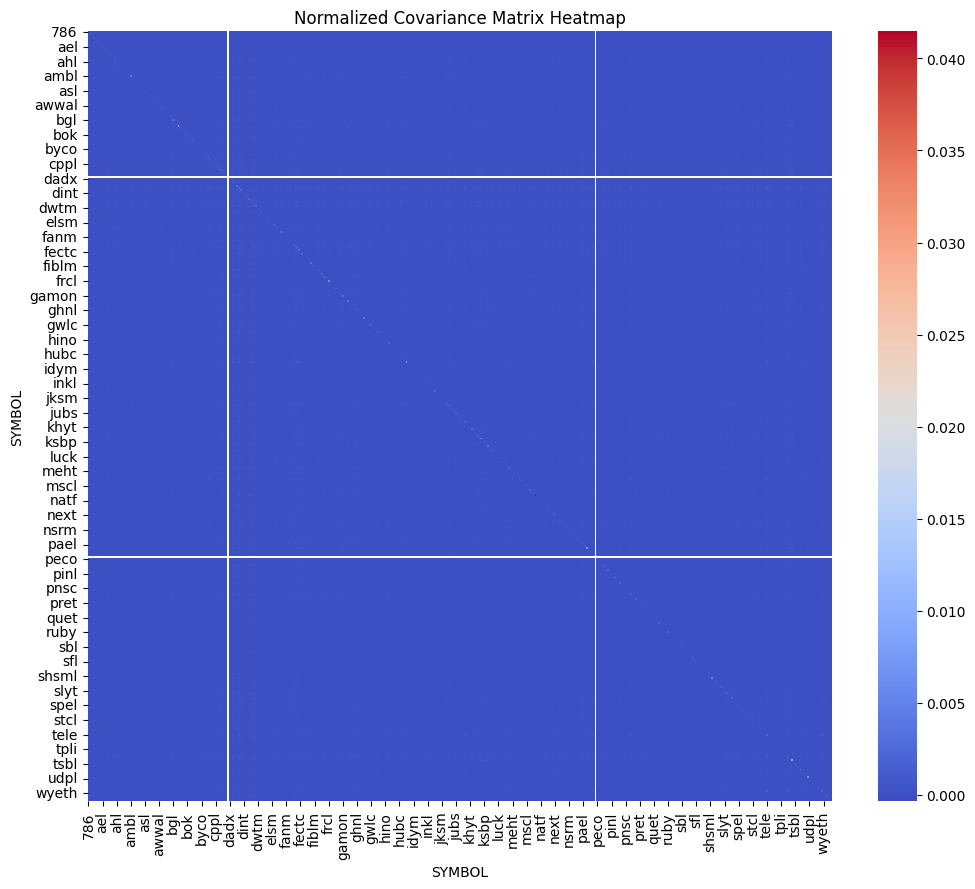

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, cmap='coolwarm', annot=False)
plt.title('Normalized Covariance Matrix Heatmap')
plt.show()


# Define the NSGA-II Optimization Problem

In [ ]:
from pymoo.core.problem import Problem

class PortfolioOptimizationProblem(Problem):
    def __init__(self, returns, covariance, volumes):
        super().__init__(n_var=len(returns), n_obj=3, n_constr=1, xl=0.0, xu=0.3)
        self.returns = np.nan_to_num(returns)
        self.covariance = np.nan_to_num(covariance)
        self.volumes = np.nan_to_num(volumes)

    def _evaluate(self, x, out, *args, **kwargs):
        # Initialize the output arrays within _evaluate
        out["F"] = np.full((x.shape[0], self.n_obj), np.nan)
        out["G"] = np.full((x.shape[0], self.n_constr), np.nan)

        # Iterate over each individual in the population
        for i in range(x.shape[0]):
            # Portfolio return for the individual
            portfolio_return = np.sum(x[i, :] * self.returns)

            # Portfolio risk (variance) for the individual
            portfolio_risk = np.dot(x[i, :].T, np.dot(self.covariance, x[i, :]))

            # Portfolio liquidity for the individual
            portfolio_liquidity = np.sum(x[i, :] * self.volumes)

            # Apply scaling to prevent overflow
            max_value = 1e6
            portfolio_return = np.clip(portfolio_return, -max_value, max_value)
            portfolio_risk = np.clip(portfolio_risk, 0, max_value)
            portfolio_liquidity = np.clip(portfolio_liquidity, -max_value, max_value)

            # Constraint: Sum of weights must equal 1
            constraint = np.sum(x[i, :]) - 1.0

            # Store objectives in the output array
            out["F"][i] = [-portfolio_return, portfolio_risk, -portfolio_liquidity]
            out["G"][i] = [constraint]

#Verifying Objective Function Values Before Optimization Execution

In [ ]:
# Extract necessary data for optimization
returns = returns_pivot.mean().values
# Filter avg_volume to include only symbols present in returns_pivot
volumes = avg_volume[avg_volume['SYMBOL'].isin(returns_pivot.columns)]['AVG_VOLUME'].values
cov_matrix_values = cov_matrix.values

# Inspect objective function values with random weights
sample_weights = np.random.dirichlet(np.ones(len(returns)), size=5)

# Debug print for objective function outputs
for i, weights in enumerate(sample_weights):
    # Calculate objectives
    portfolio_return = np.sum(weights * returns)
    portfolio_risk = np.dot(weights.T, np.dot(cov_matrix_values, weights))
    portfolio_liquidity = np.sum(weights * volumes)  # Now shapes should match

    print(f"\nSample {i+1}:")
    print("Weights:", weights)
    print("Return:", portfolio_return)
    print("Risk:", portfolio_risk)
    print("Liquidity:", portfolio_liquidity)


Sample 1:
Weights: [1.14115070e-03 2.29755430e-03 1.33331253e-04 1.48556321e-03
 4.04381119e-03 2.90475538e-03 3.28045226e-04 7.19126103e-04
 1.16971608e-02 1.62908382e-03 2.00289735e-03 3.95823102e-04
 9.21409074e-04 1.09599967e-02 1.74670331e-03 1.12761709e-03
 4.06751016e-04 1.27774552e-04 2.33843297e-04 5.94786856e-04
 3.42982787e-03 3.55684507e-03 7.51902246e-04 1.07452609e-03
 1.41076857e-03 5.31196218e-03 2.63499101e-03 6.20707738e-04
 4.90684147e-05 7.25129633e-05 3.51289667e-03 5.58730528e-03
 1.98506149e-03 1.92195359e-03 2.49592240e-03 2.87166131e-04
 1.84518996e-03 3.60426856e-03 2.36635496e-03 8.74758930e-04
 1.05378150e-03 1.41474875e-04 4.30593100e-03 4.55982089e-03
 2.46018823e-03 3.41181219e-03 2.76599784e-03 1.57920303e-03
 9.09772994e-04 1.59141955e-03 5.59777051e-03 3.63434118e-03
 6.09536093e-04 4.74625439e-04 6.24039377e-03 6.64628432e-03
 6.82624244e-03 2.09591302e-03 5.56439982e-03 8.30098323e-04
 2.11350131e-03 5.23943345e-03 6.82536496e-04 3.27657386e-03
 3.6

# Optimization Execution - NSGA-II Implementation

In [ ]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

# Extract necessary data for optimization
returns = returns_pivot.mean().values
# Filter avg_volume to include only symbols present in returns_pivot, ensuring consistent dimensions
volumes = avg_volume[avg_volume['SYMBOL'].isin(returns_pivot.columns)]['AVG_VOLUME'].values
cov_matrix_values = cov_matrix.values

# Check for data integrity
if len(returns) == 0 or cov_matrix_values.shape[0] == 0:
    print("Insufficient data for optimization.")
else:
    # Instantiate the problem
    problem = PortfolioOptimizationProblem(returns, cov_matrix_values, volumes)

    # NSGA-II settings
    algorithm = NSGA2(pop_size=1000)

    # Run the optimization
    result = minimize(problem, algorithm, ('n_gen', 500), seed=42, verbose=True)

    if result.F is not None:
        pareto_front = result.F
        weights = result.X
        print("Pareto Front Solutions:\n", pareto_front)
    else:
        print("No Pareto Front Solutions Found.")
        # Print problem details for debugging
        print("Problem details:")
        print(" - Number of variables:", problem.n_var)
        print(" - Number of objectives:", problem.n_obj)
        print(" - Number of constraints:", problem.n_constr)
        print(" - Returns shape:", returns.shape)
        print(" - Covariance shape:", cov_matrix.values.shape)
        print(" - Volumes shape:", volumes.shape)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |     1000 |      1 |  5.573764E+01 |  6.217188E+01 |             - |             -
     2 |     2000 |      1 |  5.570544E+01 |  6.032699E+01 |             - |             -
     3 |     3000 |      1 |  5.455997E+01 |  5.907747E+01 |             - |             -
     4 |     4000 |      1 |  5.357010E+01 |  5.792927E+01 |             - |             -
     5 |     5000 |      1 |  5.322904E+01 |  5.679523E+01 |             - |             -
     6 |     6000 |      1 |  5.217122E+01 |  5.566546E+01 |             - |             -
     7 |     7000 |      1 |  4.996903E+01 |  5.462331E+01 |             - |             -
     8 |     8000 |      1 |  4.909263E+01 |  5.359154E+01 |             - |             -
     9 |     9000 |      1 |  4.762351E+01 |  5.257242E+01 |             - |             -
    10 |    10000 |      1 |  4.731734E+01 |  5.154491E+01 |             - |             -

# Visualize the Results

Pareto Front Shape: (82, 3)
Sample Pareto Front Solutions (Clipped):
 [[-1.00000000e+06  4.92654983e-09 -2.09968640e+05]
 [-1.00000000e+06  1.07262357e-08 -7.45681556e+05]
 [-1.00000000e+06  6.49550646e-09 -4.58860191e+05]
 [-1.00000000e+06  7.38463261e-09 -5.37163325e+05]
 [-1.00000000e+06  8.37313036e-09 -5.91821554e+05]]


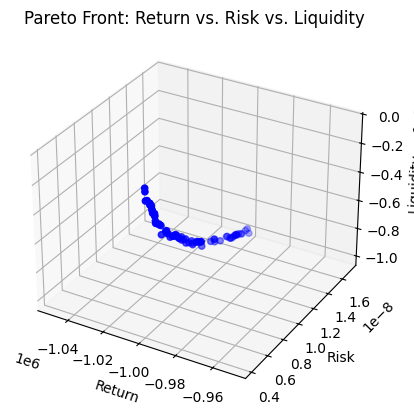

In [ ]:
if result.F is not None and len(result.F) > 0:
    pareto_front = np.clip(result.F, -1e6, 1e6)  # Clip to a reasonable range
    weights = result.X

    # Debug print to verify structure of pareto_front
    print("Pareto Front Shape:", pareto_front.shape)
    print("Sample Pareto Front Solutions (Clipped):\n", pareto_front[:5])

    from mpl_toolkits.mplot3d import Axes3D

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot\
    ax.scatter(
        pareto_front[:, 0],  # Return
        pareto_front[:, 1],  # Risk
        pareto_front[:, 2],  # Liquidity
        c='blue', marker='o'
    )

    ax.set_xlabel('Return')
    ax.set_ylabel('Risk')
    ax.set_zlabel('Liquidity')
    plt.title('Pareto Front: Return vs. Risk vs. Liquidity')
    plt.show()

else:
    print("No valid Pareto Front to visualize.")

#Define the Backtesting Function

In [ ]:
def backtest_portfolio(weights, historical_data, start_date, end_date):
    """
    Backtest the portfolio over a specified time period.

    Args:
        weights (np.array): Optimized portfolio weights.
        historical_data (pd.DataFrame): DataFrame containing stock returns with columns as stock symbols.
        start_date (str): Start date for backtesting (YYYY-MM-DD).
        end_date (str): End date for backtesting (YYYY-MM-DD).

    Returns:
        pd.DataFrame: DataFrame with cumulative returns and key performance metrics.
    """
    # Filter data for the given date range
    backtest_data = historical_data[(historical_data.index >= start_date) & (historical_data.index <= end_date)]

    if backtest_data.empty:
        print(f"Warning: No data available for the backtesting period from {start_date} to {end_date}.")
        # Return an empty performance_metrics DataFrame
        return pd.DataFrame()

    # Calculate portfolio returns
    portfolio_returns = (backtest_data * weights).sum(axis=1)

    # Calculate cumulative returns
    cumulative_returns = (1 + portfolio_returns).cumprod()

    # Calculate key performance metrics
    total_return = cumulative_returns.iloc[-1] - 1  # Cumulative return
    volatility = portfolio_returns.std() * (252 ** 0.5)  # Annualized volatility
    sharpe_ratio = (portfolio_returns.mean() / portfolio_returns.std()) * (252 ** 0.5)

    # Compile results into a DataFrame
    performance_metrics = pd.DataFrame({
        "Date": backtest_data.index,
        "Portfolio Returns": portfolio_returns,
        "Cumulative Returns": cumulative_returns
    }).set_index("Date")

    # Print key performance metrics
    print(f"Total Return: {total_return:.2%}")
    print(f"Annualized Volatility: {volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

    return performance_metrics, total_return, volatility, sharpe_ratio

#Apply the Backtesting Function


Backtesting Solution 1/82:
Total Return: -0.13%
Annualized Volatility: 0.36%
Sharpe Ratio: -0.12

Backtesting Solution 2/82:
Total Return: 0.05%
Annualized Volatility: 0.31%
Sharpe Ratio: 0.05

Backtesting Solution 3/82:
Total Return: -0.38%
Annualized Volatility: 0.41%
Sharpe Ratio: -0.31

Backtesting Solution 4/82:
Total Return: 0.34%
Annualized Volatility: 0.20%
Sharpe Ratio: 0.60

Backtesting Solution 5/82:
Total Return: -0.06%
Annualized Volatility: 0.40%
Sharpe Ratio: -0.05

Backtesting Solution 6/82:
Total Return: -0.26%
Annualized Volatility: 0.73%
Sharpe Ratio: -0.12

Backtesting Solution 7/82:
Total Return: -0.29%
Annualized Volatility: 0.44%
Sharpe Ratio: -0.22

Backtesting Solution 8/82:
Total Return: 0.04%
Annualized Volatility: 0.36%
Sharpe Ratio: 0.04

Backtesting Solution 9/82:
Total Return: -0.35%
Annualized Volatility: 0.41%
Sharpe Ratio: -0.29

Backtesting Solution 10/82:
Total Return: -0.01%
Annualized Volatility: 0.82%
Sharpe Ratio: -0.00

Backtesting Solution 11/

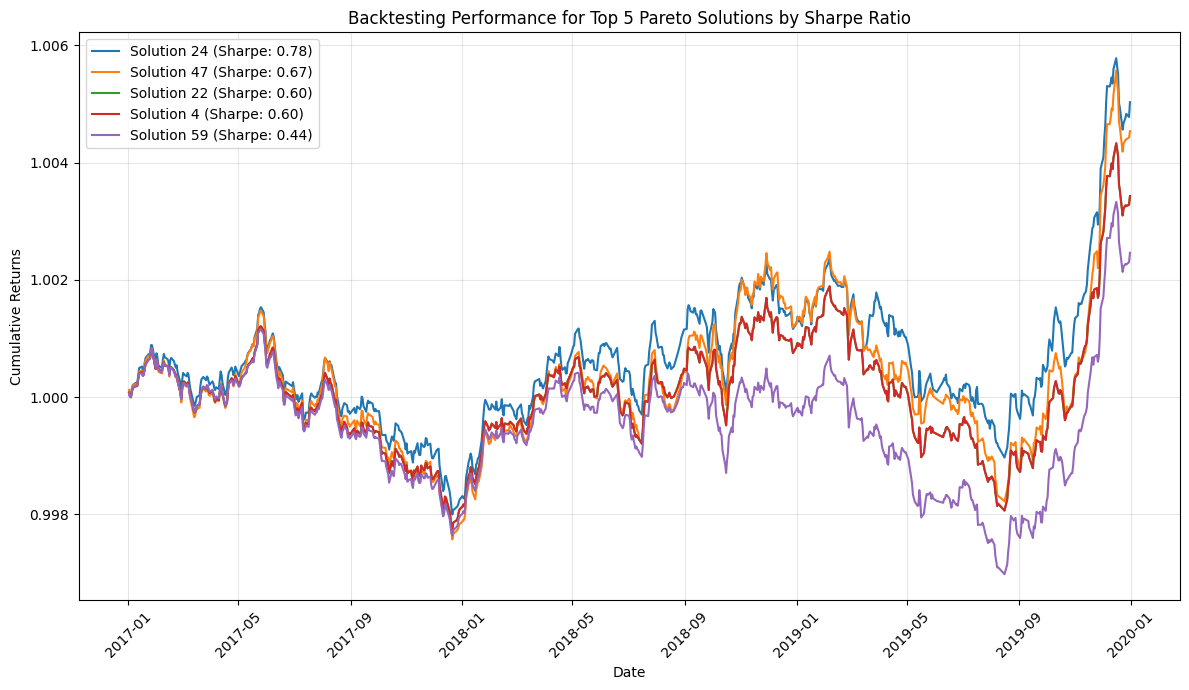


Performance Metrics for Top 5 Solutions by Sharpe Ratio:


,Sharpe Ratio,Total Return,Annualized Volatility
0,0.779091,0.005030,0.002190
1,0.672039,0.004536,0.002291
2,0.596884,0.003427,0.001950
3,0.596771,0.003428,0.001951
4,0.443776,0.002462,0.001886


In [ ]:
# Ensure returns_pivot is available
if 'returns_pivot' not in locals():
    print("Error: returns_pivot DataFrame not found. Please run the previous cells.")
else:
    # Use the returns_pivot DataFrame for backtesting
    historical_returns_data = returns_pivot.copy()

    # Ensure the columns of historical_returns_data match the symbols for optimal_weights
    if 'weights' not in locals() or weights is None:
        print("Error: Optimization results (weights) not found. Please run the optimization cell.")
    elif historical_returns_data.columns.tolist() != returns_pivot.columns.tolist():
        print("Warning: Columns of historical_returns_data do not match the symbols used for optimization.")
        # Reindex to match the optimization symbols
        historical_returns_data = historical_returns_data[returns_pivot.columns]

    # Define backtesting period
    start_date = "2017-01-01"
    end_date = "2019-12-31"

    # Ensure the date range is valid
    if start_date < str(historical_returns_data.index.min()) or end_date > str(historical_returns_data.index.max()):
        print(f"Error: Date range is outside the data range: {historical_returns_data.index.min().strftime('%Y-%m-%d')} to {historical_returns_data.index.max().strftime('%Y-%m-%d')}")
    else:
        # Initialize storage for performance metrics
        all_metrics = []

        # Iterate over each solution in the Pareto Front
        # Ensure weights is not None and has data
        if weights is not None and len(weights) > 0:
            for idx, solution_weights in enumerate(weights):
                try:
                    print(f"\nBacktesting Solution {idx + 1}/{len(weights)}:")
                    # Run backtesting - unpack the tuple returned by the updated function
                    performance_df, total_return, volatility, sharpe_ratio = backtest_portfolio(solution_weights, historical_returns_data, start_date, end_date)

                    # Store Sharpe Ratio and other metrics directly
                    metrics_dict = {
                        "Solution Index": idx, # Use 0-based index to align with all_metrics list index
                        "Sharpe Ratio": sharpe_ratio,
                        "Total Return": total_return,
                        "Annualized Volatility": volatility,
                        "Cumulative Returns": performance_df["Cumulative Returns"] # Store the Cumulative Returns series
                    }

                    # Append to the collection
                    all_metrics.append(metrics_dict)

                except Exception as e:
                    print(f"Error during backtesting for Solution {idx + 1}: {e}")
        else:
            print("No optimized weights found to perform backtesting.")

        print()

        # Check if any metrics were collected before creating DataFrame
        if all_metrics:
            # Convert to DataFrame for sorting, EXCLUDING the 'Cumulative Returns' column initially
            # This avoids the ValueError during replace/dropna
            metrics_df_for_sorting = pd.DataFrame([{k: v for k, v in d.items() if k != 'Cumulative Returns'} for d in all_metrics])

            # Sort by Sharpe Ratio (descending) and select the top 5
            # Handle cases where Sharpe Ratio might be NaN or Inf if backtest_data was empty
            metrics_df_for_sorting = metrics_df_for_sorting.replace([np.inf, -np.inf], np.nan).dropna(subset=['Sharpe Ratio'])

            if not metrics_df_for_sorting.empty:
                # Get the indices of the top 5 solutions from the sorted DataFrame
                top_5_indices = metrics_df_for_sorting.sort_values(by="Sharpe Ratio", ascending=False).head(5).index.tolist()

                # Plot the cumulative returns for the top 5 solutions using the original all_metrics list and the indices
                plt.figure(figsize=(12, 7))
                for idx in top_5_indices:
                     solution_data = all_metrics[idx]
                     cumulative_returns_series = solution_data["Cumulative Returns"]
                     plt.plot(cumulative_returns_series.index, cumulative_returns_series.values, label=f"Solution {solution_data['Solution Index'] + 1} (Sharpe: {solution_data['Sharpe Ratio']:.2f})")


                # Finalize plot
                plt.xlabel("Date")
                plt.ylabel("Cumulative Returns")
                plt.title("Backtesting Performance for Top 5 Pareto Solutions by Sharpe Ratio")
                plt.legend()
                plt.grid(alpha=0.3)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

                # Display top 5 performance metrics
                print("\nPerformance Metrics for Top 5 Solutions by Sharpe Ratio:")
                # Display the performance metrics from the sorted DataFrame
                display(metrics_df_for_sorting.loc[top_5_indices].drop(columns=["Solution Index"]).reset_index(drop=True))
            else:
                print("No valid solutions found after handling NaN/Inf Sharpe Ratios.")
        else:
            print("No performance metrics were collected. Backtesting might have failed for all solutions.")